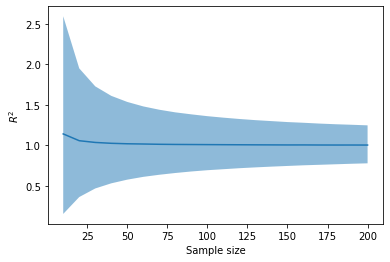

In [2]:
#PIERWSZY WYKRES  Z PREZENTACJI Z 1MLN POWTÓRZENIAMI
import numpy as np
import matplotlib.pyplot as plt

sizes = np.arange(10, 210, 10)
reps = 1000000

def sim_r_squared(n):
    x = np.random.normal(size=n)
    y = 1 + x + np.random.normal(size=n)
    model = np.polyfit(x, y, 1)
    return model[0] ** 2

r_squared_q95 = np.zeros(len(sizes))
r_squared_q5 = np.zeros(len(sizes))
r_squared_mean = np.zeros(len(sizes))

for i in range(len(sizes)):
    result = np.array([sim_r_squared(sizes[i]) for _ in range(reps)])
    r_squared_mean[i] = np.mean(result)
    r_squared_q5[i] = np.percentile(result, 5)
    r_squared_q95[i] = np.percentile(result, 95)

plt.plot(sizes, r_squared_mean)
plt.fill_between(sizes, r_squared_q5, r_squared_q95, alpha=0.5)
plt.xlabel("Sample size")
plt.ylabel(r"$R^2$")
plt.show()

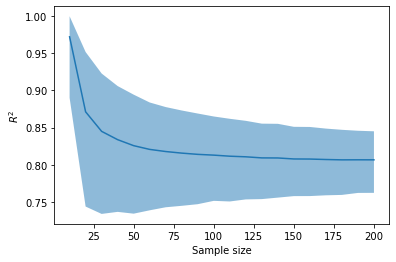

In [3]:
#DRUGI WYKRES Z REZETNACJI  Z 9 ZMIENNYMI

import numpy as np
import matplotlib.pyplot as plt

sizes = np.arange(10, 210, 10)
reps = 10000

def sim_r_squared(n):
    x = np.random.normal(size=(n, 9))
    y = 1 + x.sum(axis=1) + np.random.normal(size=n)
    model = np.linalg.lstsq(x, y, rcond=None)[1]
    return 1 - model / (y.size * y.var())

r_squared_q95 = np.zeros(len(sizes))
r_squared_q5 = np.zeros(len(sizes))
r_squared_mean = np.zeros(len(sizes))

for i in range(len(sizes)):
    result = np.array([sim_r_squared(sizes[i]) for _ in range(reps)])
    r_squared_mean[i] = np.mean(result)
    r_squared_q5[i] = np.percentile(result, 5)
    r_squared_q95[i] = np.percentile(result, 95)

plt.plot(sizes, r_squared_mean)
plt.fill_between(sizes, r_squared_q5, r_squared_q95, alpha=0.5)
plt.xlabel("Sample size")
plt.ylabel(r"$R^2$")
plt.show()